#DSC 672 Project by Vikram Kalister and Shreyas Ravi

## Importing Packages

In [1]:
import sklearn
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sklearn.__version__

'1.1.1'

In [ ]:
pip install imblearn

In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [3]:
data = pd.read_csv('cardio_train-1.csv', sep = ";")

In [4]:
data.shape

(70000, 13)

In [5]:
df = data.sample(frac=0.25)

In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
43233,61755,18186,2,172,75.0,80,50,2,2,0,0,1,1
40766,58253,20340,1,156,60.0,130,80,1,1,0,0,1,0
34353,49074,23191,1,155,56.0,120,80,1,1,0,0,1,0
42833,61189,21091,1,164,85.0,120,80,3,3,0,0,0,0
23504,33582,15934,1,165,61.0,120,80,1,1,0,0,1,0


In [7]:
df.shape

(17500, 13)

In [8]:
df.info()
df["age"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17500 entries, 43233 to 35213
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           17500 non-null  int64  
 1   age          17500 non-null  int64  
 2   gender       17500 non-null  int64  
 3   height       17500 non-null  int64  
 4   weight       17500 non-null  float64
 5   ap_hi        17500 non-null  int64  
 6   ap_lo        17500 non-null  int64  
 7   cholesterol  17500 non-null  int64  
 8   gluc         17500 non-null  int64  
 9   smoke        17500 non-null  int64  
 10  alco         17500 non-null  int64  
 11  active       17500 non-null  int64  
 12  cardio       17500 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 1.9 MB


43233    18186
40766    20340
34353    23191
42833    21091
23504    15934
         ...  
19560    19657
49428    22094
18349    18187
16376    18923
35213    17491
Name: age, Length: 17500, dtype: int64

In [9]:
df["Age"] = df["age"]/365
del df["age"]
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age
43233,61755,2,172,75.0,80,50,2,2,0,0,1,1,49.824658
40766,58253,1,156,60.0,130,80,1,1,0,0,1,0,55.726027
34353,49074,1,155,56.0,120,80,1,1,0,0,1,0,63.536986
42833,61189,1,164,85.0,120,80,3,3,0,0,0,0,57.783562
23504,33582,1,165,61.0,120,80,1,1,0,0,1,0,43.654795


In [10]:
df['height'] = df['height']/100

In [11]:
df['height']

43233    1.72
40766    1.56
34353    1.55
42833    1.64
23504    1.65
         ... 
19560    1.75
49428    1.78
18349    1.75
16376    1.70
35213    1.67
Name: height, Length: 17500, dtype: float64

In [12]:
df['bmi'] = df['weight']/((df['height'])**2)

In [13]:
del df['weight']
del df['height']

In [14]:
df.head()

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age,bmi
43233,61755,2,80,50,2,2,0,0,1,1,49.824658,25.351541
40766,58253,1,130,80,1,1,0,0,1,0,55.726027,24.654832
34353,49074,1,120,80,1,1,0,0,1,0,63.536986,23.309053
42833,61189,1,120,80,3,3,0,0,0,0,57.783562,31.603212
23504,33582,1,120,80,1,1,0,0,1,0,43.654795,22.405877


In [15]:
 df['bmi']

43233    25.351541
40766    24.654832
34353    23.309053
42833    31.603212
23504    22.405877
           ...    
19560    23.510204
49428    29.352355
18349    30.367347
16376    29.411765
35213    26.892323
Name: bmi, Length: 17500, dtype: float64

In [16]:
df["age"] = df["Age"].round()
del df["Age"]
del df['id']
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
43233,2,80,50,2,2,0,0,1,1,25.351541,50.0
40766,1,130,80,1,1,0,0,1,0,24.654832,56.0
34353,1,120,80,1,1,0,0,1,0,23.309053,64.0
42833,1,120,80,3,3,0,0,0,0,31.603212,58.0
23504,1,120,80,1,1,0,0,1,0,22.405877,44.0


In [17]:
df['bmi'] = df['bmi'].round()
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
43233,2,80,50,2,2,0,0,1,1,25.0,50.0
40766,1,130,80,1,1,0,0,1,0,25.0,56.0
34353,1,120,80,1,1,0,0,1,0,23.0,64.0
42833,1,120,80,3,3,0,0,0,0,32.0,58.0
23504,1,120,80,1,1,0,0,1,0,22.0,44.0


In [18]:
df = df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]]
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
43233,2,80,50,2,2,0,0,1,1,25.0,50.0
40766,1,130,80,1,1,0,0,1,0,25.0,56.0
34353,1,120,80,1,1,0,0,1,0,23.0,64.0
42833,1,120,80,3,3,0,0,0,0,32.0,58.0
23504,1,120,80,1,1,0,0,1,0,22.0,44.0


In [19]:
scaler = MinMaxScaler()

In [20]:
df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]] = scaler.fit_transform(df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]])

In [21]:
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
43233,1.0,0.141026,0.005495,0.5,0.5,0.0,0.0,1.0,1.0,0.123596,0.571429
40766,0.0,0.173077,0.008791,0.0,0.0,0.0,0.0,1.0,0.0,0.123596,0.742857
34353,0.0,0.166667,0.008791,0.0,0.0,0.0,0.0,1.0,0.0,0.112360,0.971429
42833,0.0,0.166667,0.008791,1.0,1.0,0.0,0.0,0.0,0.0,0.162921,0.800000
23504,0.0,0.166667,0.008791,0.0,0.0,0.0,0.0,1.0,0.0,0.106742,0.400000


Text(0.5, 1.0, 'Correlation Plot')

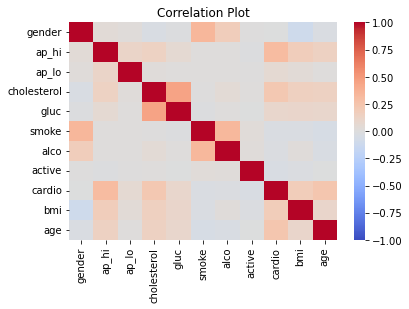

In [22]:
sns.heatmap(data = df.corr(), vmin = -1, vmax = 1, cmap = "coolwarm")
plt.title("Correlation Plot")

Text(0.5, 1.0, 'Presence of Heart Disease based on activity')

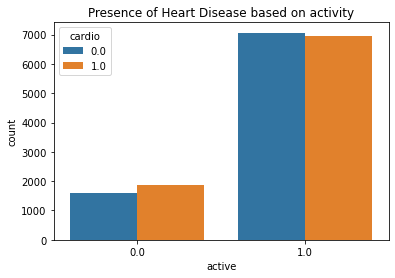

In [23]:
sns.countplot(x = "active", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on activity")

Text(0.5, 1.0, 'Presence of Heart Disease based on age')

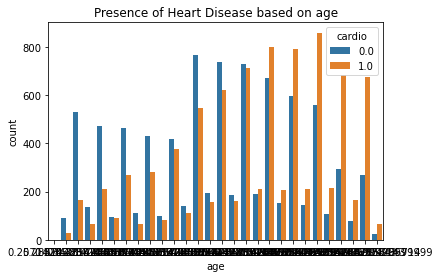

In [24]:
sns.countplot(x = "age", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on age")

Text(0.5, 1.0, 'Presence of Heart Disease based on cholesterol')

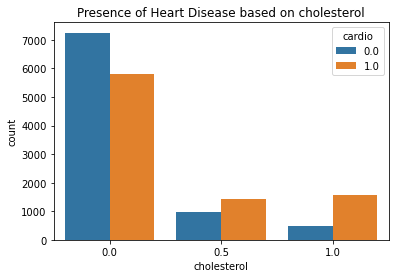

In [25]:
sns.countplot(x = "cholesterol", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on cholesterol")

In [26]:
X = df.drop("cardio", axis = 1)
y = df["cardio"]

## Multicolinearity & Feature Selection

In [27]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
"""""X = df[list(df.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)'"""""
#High VIF indicates that there's multicollinearity

'""X = df[list(df.columns)]\nvif_info = pd.DataFrame()\nvif_info[\'VIF\'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\nvif_info[\'Column\'] = X.columns\nvif_info.sort_values(\'VIF\', ascending=False)\''

## Models Used
1. Decision Trees
2. Random Forest Classifier
3. Naive Bayes
4. Support Vector Machines (SVM)
5. Support Vector Machines (PCA)
6. Bayesian Analysis

## Preparing Data for Machine Learning

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

### SMOTE

In [30]:
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (17500, 10)
Shape of X after SMOTE: (17644, 10)


In [31]:
rf = RandomForestClassifier()

In [32]:
rf.fit(X_sm, y_sm)

RandomForestClassifier()

In [33]:
predrfc = rf.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = predrfc)

0.9175238095238095

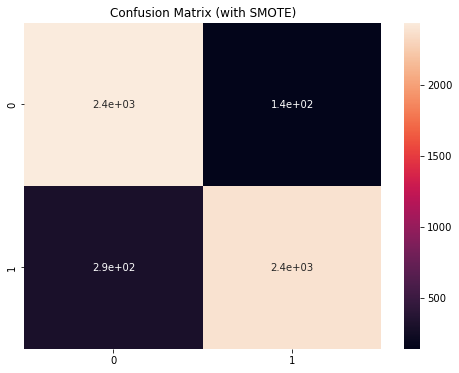

In [34]:
cm = confusion_matrix(y_test, predrfc)
plt.figure(figsize = (8, 6))
plt.title('Confusion Matrix (with SMOTE)')
sns.heatmap(cm, annot = True, cmap = 'rocket');

## Decision Trees

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [36]:
dt = DecisionTreeClassifier()

In [37]:
dt.fit(X_sm, y_sm)

DecisionTreeClassifier()

In [38]:
pred_train = dt.predict(X_sm)

In [39]:
print("Accuracy Train", metrics.accuracy_score(y_sm, pred_train))

Accuracy Train 0.9161754704148719


In [40]:
pred = dt.predict(X_test)

In [41]:
print("Accuracy Test", metrics.accuracy_score(y_test, pred))

Accuracy Test 0.9156190476190477


In [42]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      2579
         1.0       0.97      0.86      0.91      2671

    accuracy                           0.92      5250
   macro avg       0.92      0.92      0.92      5250
weighted avg       0.92      0.92      0.92      5250



### Grid Search for Decision Trees

In [52]:
parameters = {
    "criterion": ['gini', 'entropy'], 
    "max_depth": [10, 50, 100, 200], 
    "min_samples_split": range(2, 12),
    "min_samples_leaf": range(1, 5)
}

In [53]:
grid_dt = GridSearchCV(dt, parameters, cv = 3, n_jobs = -1)

In [54]:
grid_dt.fit(X_sm, y_sm)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100, 200],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 12)})

In [55]:
grid_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=9)

In [56]:
dtcv = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=9)

In [57]:
dtcv.fit(X_sm, y_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=9)

In [58]:
dtcv_pred = dtcv.predict(X_test)

In [59]:
print(confusion_matrix(y_test, dtcv_pred))

[[1981  598]
 [ 700 1971]]


In [60]:
print(metrics.classification_report(y_test, dtcv_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75      2579
         1.0       0.77      0.74      0.75      2671

    accuracy                           0.75      5250
   macro avg       0.75      0.75      0.75      5250
weighted avg       0.75      0.75      0.75      5250



## Random Forest Classifier

In [43]:
RF = RandomForestClassifier()

In [44]:
RF.fit(X_sm, y_sm)

RandomForestClassifier()

In [45]:
pred = RF.predict(X_sm)
metrics.accuracy_score(y_true = y_sm, y_pred = pred)

0.9160621174336885

In [46]:
pred_test = RF.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = pred_test)

0.9161904761904762

In [47]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92      2579
         1.0       0.94      0.89      0.92      2671

    accuracy                           0.92      5250
   macro avg       0.92      0.92      0.92      5250
weighted avg       0.92      0.92      0.92      5250



### Grid Search for Random Forest Classifier

In [ ]:
parameters = {
    "min_samples_split": [100, 500, 1000, 2000], 
    "max_depth": [10, 50, 100, 200], 
    "n_estimators": [100, 500, 1000]
}

In [ ]:
grid = GridSearchCV(RF, parameters, cv = 3, n_jobs = -1)

In [ ]:
grid.fit(X_sm, y_sm)

In [ ]:
grid.best_estimator_

In [ ]:
rf = RandomForestClassifier(max_depth=10, min_samples_split=100)

In [ ]:
rf.fit(X_sm, y_sm)

In [ ]:
rf_pred = rf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, rf_pred))

In [ ]:
print(metrics.classification_report(y_test, rf_pred))

Shows an accuracy of 0.73 and precision of 0.75 and recall of 0.66

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
g = GaussianNB()

In [ ]:
g.fit(X_sm, y_sm)

In [ ]:
pred = g.predict(X_sm)
metrics.accuracy_score(y_sm, pred)

In [ ]:
pred = g.predict(X_test)
metrics.accuracy_score(y_test, pred)

In [ ]:
print(metrics.classification_report(y_test,pred))

### Grid Search for Naive Bayes

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
parameters = {
    "priors": [None],
    "var_smoothing": np.logspace(0,-9, num = 100)
}

In [ ]:
grid = GridSearchCV(g, parameters, cv = 3, n_jobs = -1)

In [ ]:
grid.fit(X_sm, y_sm)

In [ ]:
grid.best_estimator_

In [ ]:
GNB = GaussianNB(var_smoothing=0.657933224657568)

In [ ]:
GNBNew_pred = g.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, GNBNew_pred))

In [ ]:
print(classification_report(y_test, GNBNew_pred))

## Support Vector Machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
estimator = SVC(kernel ='rbf')

In [ ]:
estimator.fit(X_sm, y_sm)

In [ ]:
pred = estimator.predict(X_sm)

In [ ]:
svm = metrics.accuracy_score(y_sm, pred)

In [ ]:
svm_pred2 = estimator.predict(X_test)

In [ ]:
svm1 = metrics.accuracy_score(y_test,svm_pred2)

In [ ]:
print("Training Accuracy: " + str(svm))
print("Testing Accuracy: " + str(svm1))

In [ ]:
print(metrics.classification_report(y_test, svm_pred2))

### Grid Search for Support Vector Machines

In [ ]:
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100, 1000]
}

In [ ]:
cv_1 = GridSearchCV(estimator, parameters, cv=3, n_jobs=-1)

In [ ]:
cv_1.fit(X_sm, y_sm)

In [ ]:
cv_1.best_estimator_

In [ ]:
svc = SVC(C=1000, kernel='linear')

In [ ]:
svc.fit(X_sm, y_sm)

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, svc_pred))

In [ ]:
print(metrics.classification_report(y_test, svc_pred))

## Ada Boost Classifier ##

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
AdaBoostClassifier()

In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_sm, y_sm)

In [ ]:
abc_pred_train = abc.predict(X_sm)
accuracy_score(y_sm, y_pred=abc_pred_train) #training accuracy

In [ ]:
abc_pred_test = abc.predict(X_test)
accuracy_score(y_test, y_pred=abc_pred_test) #testing accuracy

In [ ]:
cm_abc = confusion_matrix(y_test, abc_pred_test)
print(cm_abc)

In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred = abc_pred_test, labels=[0, 1]))

### Grid Search for Ada Boost

In [ ]:
parameters = {
    'learning_rate': [2, 4, 6, 8, 10, 12, 14, 16],
    'n_estimators': [50, 60, 70, 80, 90]
}

In [ ]:
ab_gs = GridSearchCV(abc, parameters, cv=3, n_jobs=-1)

In [ ]:
ab_gs.fit(X_sm, y_sm)

In [ ]:
ab_gs.best_estimator_

In [ ]:
ab_1 = AdaBoostClassifier(learning_rate=6)

In [ ]:
ab_1.fit(X_sm, y_sm)

In [ ]:
ab_1_pred = ab_1.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, ab_1_pred))

In [ ]:
print(metrics.classification_report(y_test, ab_1_pred))

## Support Vector Machines (PCA)



In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=None)

pca.fit(X_sm)
X_train_pca = pca.transform(X_sm)
X_test_pca = pca.transform(X_test)

In [ ]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
X_train_pca2 = X_train_pca[:, 0:11]
X_test_pca2 = X_test_pca[:, 0:11]

In [ ]:
from sklearn.svm import SVC

In [ ]:
estimator_svc = SVC(kernel ='rbf')

In [ ]:
estimator_svc.fit(X_train_pca,y_sm)

In [ ]:
pred = estimator_svc.predict(X_train_pca)

In [ ]:
svm = metrics.accuracy_score(y_sm,pred)

In [ ]:
pred2 = estimator_svc.predict(X_test)

In [ ]:
svm1 = metrics.accuracy_score(y_test,pred2)

In [ ]:
print("Training Accuracy: " + str(svm))
print("Testing Accuracy: " + str(svm1))

In [ ]:
print(classification_report(y_test,pred2))

### Grid Search for SVM (PCA)

In [ ]:
param_pca = {'C': [1,10,100,1000],
              'gamma': [0.001,0.0001,1]}

In [ ]:
gs = GridSearchCV(estimator = estimator_svc, param_grid = 
param_pca, cv = 5, n_jobs = -1)

In [ ]:
gs.fit(X_train_pca2, y_sm)

In [ ]:
gs.best_estimator_

In [ ]:
pca_new =SVC(C = 1000, gamma = 1)

In [ ]:
pca_new.fit(X_train_pca2 ,y_sm)

In [ ]:
pca_new1 = pca_new.predict(X_test_pca2)

In [ ]:
print(metrics.classification_report(y_test, pca_new1))

## Final Data Visualizations